# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №2
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon

## №1

In [4]:
# Создает матрицу поворота для заданного угла в градусах
def build_rotation_matrix(angle_deg):

    angle_rad = np.deg2rad(angle_deg)  # Преобразование угла в радианы
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad)], # Возвращает матрицу поворота 2х2
                     [np.sin(angle_rad), np.cos(angle_rad)]])

# Поворачивает вершины полигона на заданный угол с использованием матричной алгебры
def rotate_matrix(vertices, angle_deg):

    rotation_matrix = build_rotation_matrix(angle_deg)  # Получение матрицы поворота
    rotated_vertices = np.dot(rotation_matrix, np.array(vertices).T).T  # Применение матрицы поворота к вершинам
    return rotated_vertices

# Поворачивает вершины полигона на заданный угол, используя комплексные числа
def rotate_complex(vertices, angle_deg):

    angle_rad = np.deg2rad(angle_deg)  # Преобразование угла в радианы
    rotated_vertices = [(x * np.cos(angle_rad) - y * np.sin(angle_rad), x * np.sin(angle_rad) + y * np.cos(angle_rad))
                        for (x, y) in vertices]  # Применение формулы поворота к каждой вершине
    return rotated_vertices

# Пример использования:
polygon_vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]
rotation_angle = 90  # градусы

rotated_vertices_matrix = rotate_matrix(polygon_vertices, rotation_angle)
rotated_vertices_complex = rotate_complex(polygon_vertices, rotation_angle)

rotated_vertices_matrix, rotated_vertices_complex


(array([[ 0.000000e+00,  0.000000e+00],
        [ 6.123234e-17,  1.000000e+00],
        [-1.000000e+00,  1.000000e+00],
        [-1.000000e+00,  6.123234e-17]]),
 [(0.0, 0.0),
  (6.123233995736766e-17, 1.0),
  (-0.9999999999999999, 1.0),
  (-1.0, 6.123233995736766e-17)])

## № 2

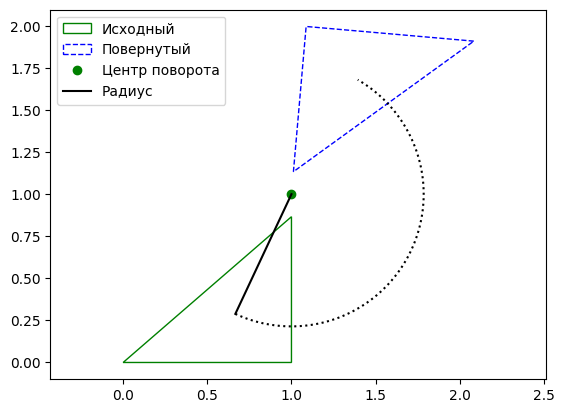

In [6]:
def rotate_around_point(vertices, angle_deg, center):

    angle_rad = np.deg2rad(angle_deg) # Конвертация угла из градусов в радианы

    # Перемещение вершин к началу координат (вычитание координат центра)
    vertices = np.array(vertices) - center

    # Создание матрицы поворота
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    # Применение матрицы поворота к вершинам
    rotated_vertices = np.dot(vertices, rotation_matrix.T)  # Изменен порядок умножения

    # Возвращение вершин обратно (прибавление координат центра)
    rotated_vertices += center

    return rotated_vertices  # Возвращение повернутых вершин

def visualize_rotation(vertices, rotated_vertices, center, angle_deg):

    center_of_mass = np.mean(vertices, axis=0) # Вычисление центра масс вершин
    fig, ax = plt.subplots() # Создание фигуры и осей

    # Построение исходного и повернутого полигонов
    polygon = plt.Polygon(vertices, fill=None, edgecolor='green', label='Исходный')
    rotated_polygon = plt.Polygon(rotated_vertices, fill=None, edgecolor='b', linestyle='--', label='Повернутый')
    ax.add_patch(polygon)
    ax.add_patch(rotated_polygon)

    # Построение центра поворота и радиуса
    ax.plot(*center, 'go', label='Центр поворота')
    ax.plot(*zip(center, center_of_mass), 'k-', label='Радиус')

    # Построение дуги
    theta = np.linspace(0, np.deg2rad(angle_deg), 100)
    x_arc = center[0] + (center_of_mass[0] - center[0]) * np.cos(theta) - (center_of_mass[1] - center[1]) * np.sin(theta)
    y_arc = center[1] + (center_of_mass[0] - center[0]) * np.sin(theta) + (center_of_mass[1] - center[1]) * np.cos(theta)
    ax.plot(x_arc, y_arc, 'k:')

    # Установка одинакового масштабирования и легенды
    ax.axis('equal')
    ax.legend()
    plt.show()  # Отображение графика

# Пример использования:
triangle_vertices = [(0, 0), (1, 0), (1, np.sqrt(3)/2)]  # Вершины треугольника
rotation_center = (1, 1)  # Центр поворота
rotation_angle = 175  # Угол поворота в градусах

# Вызов функций для поворота и визуализации
rotated_vertices = rotate_around_point(triangle_vertices, rotation_angle, rotation_center)
visualize_rotation(triangle_vertices, rotated_vertices, rotation_center, rotation_angle)


## №3

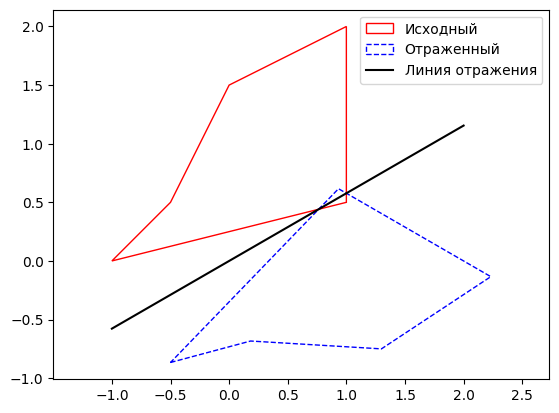

In [17]:
# Создает матрицу поворота для заданного угла в градусах
def build_rotation_matrix(angle_deg):

    angle_rad = np.deg2rad(angle_deg)
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                     [np.sin(angle_rad), np.cos(angle_rad)]])

# Поворачивает вершины на заданный угол
def rotate_vertices(vertices, angle_deg):

    rotation_matrix = build_rotation_matrix(angle_deg)
    rotated_vertices = np.dot(np.array(vertices), rotation_matrix.T)
    return rotated_vertices # Возвращает список повернутых вершин

# Отражает вершины относительно оси Y
def reflect_over_y(vertices):

    return [(x, -y) for (x, y) in vertices]

# Отражает полигон относительно линии, заданной углом
def reflect_polygon(vertices, angle_deg):

    # Шаг 1: Поворот вершин, чтобы выровнять линию отражения с осью Y
    rotated_vertices = rotate_vertices(vertices, -angle_deg)

    # Шаг 2: Отражение вершин относительно оси Y
    reflected_vertices = reflect_over_y(rotated_vertices)

    # Шаг 3: Поворот вершин обратно в исходное положение
    reflected_rotated_vertices = rotate_vertices(reflected_vertices, angle_deg)

    return reflected_rotated_vertices

# Пример использования:
polygon_vertices = [(-1, 0), (-0.5, 0.5), (0, 1.5), (1, 2), (1, 0.5)]
reflection_angle = 30  # градусы

reflected_vertices = reflect_polygon(polygon_vertices, reflection_angle)

# Визуализация
fig, ax = plt.subplots()

# Исходный полигон
polygon = plt.Polygon(polygon_vertices, fill=None, edgecolor='r', label='Исходный')
ax.add_patch(polygon)

# Отраженный полигон
reflected_polygon = plt.Polygon(reflected_vertices, fill=None, edgecolor='b', linestyle='--', label='Отраженный')
ax.add_patch(reflected_polygon)

# Линия отражения
x = np.linspace(-1, 2, 400)
y = x * np.tan(np.deg2rad(reflection_angle))
ax.plot(x, y, 'k-', label='Линия отражения')

ax.axis('equal')
ax.legend()
plt.show()


## №4

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

def rotate_around_point(vertices, angle_deg, center):
    # Конвертация угла из градусов в радианы
    angle_rad = np.deg2rad(angle_deg)

    # Перемещение вершин к началу координат (вычитание координат центра)
    vertices = np.array(vertices) - center

    # Создание матрицы поворота
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    # Применение матрицы поворота к вершинам
    rotated_vertices = np.dot(vertices, rotation_matrix.T)

    # Возвращение вершин обратно (прибавление координат центра)
    rotated_vertices += center

    return rotated_vertices  # Возвращение повернутых вершин

def visualize_rotation(vertices, angle_deg, center):
    # Получение повернутых вершин
    rotated_vertices = rotate_around_point(vertices, angle_deg, center)

    # Создание фигуры и осей
    fig, ax = plt.subplots()

    # Построение исходного полигона
    polygon = plt.Polygon(vertices, fill=None, edgecolor='green', label='Original')
    ax.add_patch(polygon)

    # Построение повернутого полигона
    rotated_polygon = plt.Polygon(rotated_vertices, fill=None, edgecolor='b', linestyle='--', label='Rotated')
    ax.add_patch(rotated_polygon)

    # Построение центра поворота
    ax.plot(*center, 'go', label='Center of Rotation')

    # Установка одинакового масштабирования и легенды
    ax.axis('equal')
    ax.legend()
    plt.show()

# Вершины и центр поворота
triangle_vertices = [(0, 0), (1, 0), (1, np.sqrt(3)/2)]
rotation_center = (1, 1)

# Интерактивный виджет
angle_slider = widgets.IntSlider(min=0, max=360, step=1, value=0, description='Angle (deg):')
interactive_plot = interactive(visualize_rotation,
                               vertices=widgets.fixed(triangle_vertices),
                               angle_deg=angle_slider,
                               center=widgets.fixed(rotation_center))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=0, description='Angle (deg):', max=360), Output(layout=Layout(height='35…

## №5

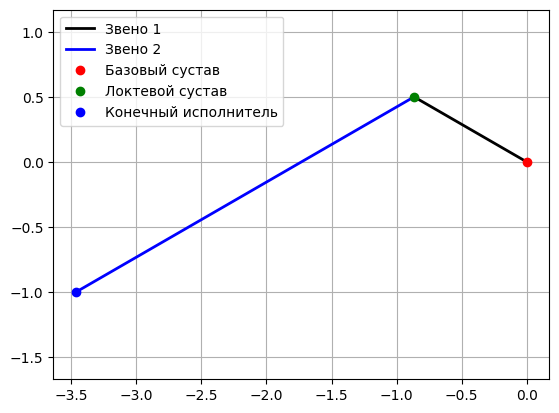

In [32]:
def plot_kinematic_pair(l1, l2, theta1_deg, theta2_deg):
    # Перевод углов из градусов в радианы
    theta1_rad = np.deg2rad(theta1_deg)
    theta2_rad = np.deg2rad(theta2_deg)

    # Расчет координат
    # Координаты локтевого сустава (конец первого звена)
    x1, y1 = l1 * np.cos(theta1_rad), l1 * np.sin(theta1_rad)
    # Координаты конечного исполнителя (конец второго звена)
    x2, y2 = x1 + l2 * np.cos(theta1_rad + theta2_rad), y1 + l2 * np.sin(theta1_rad + theta2_rad)

    # Создание фигуры и осей
    fig, ax = plt.subplots()

    # Отображение звеньев и суставов
    ax.plot([0, x1], [0, y1], 'k-', linewidth=2, label='Звено 1')  # Первое звено
    ax.plot([x1, x2], [y1, y2], 'b-', linewidth=2, label='Звено 2')  # Второе звено
    ax.plot(0, 0, 'ro', label='Базовый сустав')  # Базовый сустав
    ax.plot(x1, y1, 'go', label='Локтевой сустав')  # Локтевой сустав
    ax.plot(x2, y2, 'bo', label='Конечный исполнитель')  # Конечный исполнитель

    # Установка равного масштабирования, легенды и сетки
    ax.axis('equal')
    ax.legend()
    ax.grid(True)
    plt.show()

# Пример использования:
plot_kinematic_pair(1, 3, 150, 60)


## №6

In [34]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

# Настройка для отображения анимации в Jupyter Notebook
rc('animation', html='html5')

# Функция для анимации эпициклоиды
def animate_epicycloid(R, r, d, n, theta_step=0.1):
    # Создание фигуры и осей
    fig, ax = plt.subplots()

    # Настройка осей
    ax.axis('equal')
    ax.grid(True)
    ax.set_xlim([-R-r-d, R+r+d])
    ax.set_ylim([-R-r-d, R+r+d])

    # Инициализация линии для отображения кривой
    line, = ax.plot([], [], 'b-', linewidth=2)

    # Инициализация точки для отображения конечного исполнителя
    point, = ax.plot([], [], 'bo')

    # Функция инициализации анимации
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point

    # Функция для обновления каждого кадра анимации
    def update(frame):
        theta = np.arange(0, frame, theta_step)  # Параметр theta от 0 до текущего значения frame
        x = (R + r) * np.cos(theta) - d * np.cos(((R + r) / r) * theta)
        y = (R + r) * np.sin(theta) - d * np.sin(((R + r) / r) * theta)
        line.set_data(x, y)
        point.set_data(x[-1], y[-1])  # Установка положения конечного исполнителя в последнюю точку кривой
        return line, point

    # Создание анимации
    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 2*np.pi*n + theta_step, theta_step), init_func=init, blit=True)
    plt.close(fig)  # Закрытие фигуры, чтобы предотвратить отображение статического изображения
    return ani

# Параметры эпициклоиды для примера "дельтоида" из таблицы
R, r, d, k, n = 3, 1, 1, 3, 1

def animate_epicycloid(R, r, d, n, theta_step=0.1):
    # Создание фигуры и осей
    fig, ax = plt.subplots()

    # Настройка осей
    ax.axis('equal')
    ax.grid(True)
    ax.set_xlim([-R-r-d, R+r+d])
    ax.set_ylim([-R-r-d, R+r+d])

    # Инициализация линии для отображения кривой
    line, = ax.plot([], [], 'b-', linewidth=2)

    # Инициализация точки для отображения конечного исполнителя
    point, = ax.plot([], [], 'bo')

    # Функция инициализации анимации
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point

    # Функция для обновления каждого кадра анимации
    def update(frame):
        theta = np.arange(0, frame, theta_step)  # Параметр theta от 0 до текущего значения frame
        x = (R + r) * np.cos(theta) - d * np.cos(((R + r) / r) * theta)
        y = (R + r) * np.sin(theta) - d * np.sin(((R + r) / r) * theta)
        line.set_data(x, y)
        if len(x) > 0 and len(y) > 0:  # Проверка наличия данных перед установкой положения конечного исполнителя
            point.set_data(x[-1], y[-1])
        return line, point

    # Создание анимации
    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 2*np.pi*n + theta_step, theta_step), init_func=init, blit=True)
    plt.close(fig)  # Закрытие фигуры, чтобы предотвратить отображение статического изображения
    return ani

# Повторное создание и отображение анимации
ani = animate_epicycloid(R, r, d, n)
ani


<ipython-input-34-6da286bd6b5e>:77: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[-1], y[-1])
